# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
    #JB - As I understand it, this code generates a random list of latitudes and longitudes
    #where they are going to be reasonably uniformly distributed across the range
    #(so in this case, a relatively uniform distribution across the earth)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination

#JB - this looks like a function that for each item in the lat_lngs zip, looks for a city with the nearest
#coordinates and then returns the name of the cities.
for lat_lng in lat_lngs:
    #JB - lat_lng[0] will be the first item in lat_lng (which is a latitude)
    #JB - lat_lng[1] will be the second item in lat_lng (which is a longitude)
    #JB - these are removed from the zip after use, so we can keep citing 0 and 1 as our indexes
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
#JB - some practice to test the code before running in the for loop

city_url_test = f"{url}London&appid={weather_api_key}&units=metric"
city_weather_test = requests.get(city_url_test).json()

city_lat_test = city_weather_test["coord"]["lat"]
city_lng_test = city_weather_test["coord"]["lon"]
city_max_temp_test = city_weather_test["main"]["temp_max"]
city_humidity_test = city_weather_test["main"]["humidity"]
city_clouds_test = city_weather_test["clouds"]["all"]
city_wind_test = city_weather_test["wind"]["speed"]
city_country_test = city_weather_test["sys"]["country"]
city_date_test = city_weather_test["dt"]

print(city_lat_test)
print(city_lng_test)
print(city_max_temp_test)
print(city_humidity_test)
print(city_clouds_test)
print(city_wind_test)
print(city_country_test)
print(city_date_test)

51.5085
-0.1257
1.72
85
84
0.91
GB
1678492840


In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#JB - the enumerate function assigns a number to each city in the list, so it will read (1, city1), (2, city2) etc.
#So this for loop is looking through enumerate(cities) for each (i, city) 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | pemangkat
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | kamina
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | yerbogachen
Processing Record 10 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | grand-lahou
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | shestakovo
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | kulhudhuff

Processing Record 36 of Set 4 | jalu
Processing Record 37 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 4 | darab
Processing Record 39 of Set 4 | xining
Processing Record 40 of Set 4 | nizhniy ingash
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | jardim
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | toliary
City not found. Skipping...
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | ushtobe
Processing Record 47 of Set 4 | videira
Processing Record 48 of Set 4 | moindou
Processing Record 49 of Set 4 | tirthahalli
Processing Record 0 of Set 5 | mongu
Processing Record 1 of Set 5 | san cristobal
Processing Record 2 of Set 5 | zabaykalsk
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | raudeberg
Processing Record 6 of Set 5 | maragheh
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | grand river south east
City n

Processing Record 24 of Set 8 | lourdes
Processing Record 25 of Set 8 | nerchinskiy zavod
Processing Record 26 of Set 8 | akdepe
Processing Record 27 of Set 8 | xichang
Processing Record 28 of Set 8 | muli
Processing Record 29 of Set 8 | batabano
Processing Record 30 of Set 8 | rafraf
Processing Record 31 of Set 8 | darhan
Processing Record 32 of Set 8 | hailar
Processing Record 33 of Set 8 | trabzon
Processing Record 34 of Set 8 | airai
Processing Record 35 of Set 8 | tahta
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | nikolayevka
Processing Record 38 of Set 8 | nchelenge
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | baherden
Processing Record 41 of Set 8 | aurillac
Processing Record 42 of Set 8 | tanshui
City not found. Skipping...
Processing Record 43 of Set 8 | caldwell
Processing Record 44 of Set 8 | sohag
Processing Record 45 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 8 | avera
Processing Rec

Processing Record 13 of Set 12 | diamond bar
Processing Record 14 of Set 12 | santa isabel do rio negro
Processing Record 15 of Set 12 | gurgan
City not found. Skipping...
Processing Record 16 of Set 12 | formosa
Processing Record 17 of Set 12 | hongan
City not found. Skipping...
Processing Record 18 of Set 12 | rawson
Processing Record 19 of Set 12 | hualmay
Processing Record 20 of Set 12 | san ignacio
Processing Record 21 of Set 12 | pangoa
Processing Record 22 of Set 12 | fare
Processing Record 23 of Set 12 | madisonville
Processing Record 24 of Set 12 | starobesheve
Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | kaeo
Processing Record 27 of Set 12 | mananara
Processing Record 28 of Set 12 | luau
Processing Record 29 of Set 12 | shuiji
Processing Record 30 of Set 12 | shediac
Processing Record 31 of Set 12 | domat
Processing Record 32 of Set 12 | comodoro rivadavia
Processing Record 33 of Set 12 | tonj
Processing Record 34 of Set 12 | utiroa
City not found

In [15]:
city_data

[{'City': 'hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 20.03,
  'Humidity': 58,
  'Cloudiness': 20,
  'Wind Speed': 5.14,
  'Country': 'AU',
  'Date': 1678493579},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 8.06,
  'Humidity': 57,
  'Cloudiness': 75,
  'Wind Speed': 6.17,
  'Country': 'CL',
  'Date': 1678493579},
 {'City': 'kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 24.55,
  'Humidity': 65,
  'Cloudiness': 75,
  'Wind Speed': 5.66,
  'Country': 'US',
  'Date': 1678493580},
 {'City': 'pemangkat',
  'Lat': 1.1667,
  'Lng': 108.9667,
  'Max Temp': 24.52,
  'Humidity': 91,
  'Cloudiness': 97,
  'Wind Speed': 2.92,
  'Country': 'ID',
  'Date': 1678493580},
 {'City': 'torbay',
  'Lat': 47.6666,
  'Lng': -52.7314,
  'Max Temp': 0.88,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 4.47,
  'Country': 'CA',
  'Date': 1678493581},
 {'City': 'tautira',
  'Lat': -17.7333,
  'Lng': -149.15,
  'Max Temp': 27.91,
  'Humidity': 7

In [27]:
# Convert the cities weather data into a Pandas DataFrame
cities_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

for i in range(len(city_data)):
    cities_list.append(city_data[i]["City"])
    lat_list.append(city_data[i]["Lat"])
    lng_list.append(city_data[i]["Lng"])
    maxtemp_list.append(city_data[i]["Max Temp"])
    humidity_list.append(city_data[i]["Humidity"])
    cloudiness_list.append(city_data[i]["Cloudiness"])
    windspeed_list.append(city_data[i]["Wind Speed"])
    country_list.append(city_data[i]["Country"])
    date_list.append(city_data[i]["Date"])

city_data_df = pd.DataFrame({"City" : cities_list,
                             "Lat": lat_list,
                             "Lng": lng_list,
                             "Max Temp": maxtemp_list,
                             "Humidity": humidity_list,
                             "Cloudiness": cloudiness_list,
                             "Wind Speed": windspeed_list,
                             "Country": country_list,
                             "Date": date_list
                            })
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,20.03,58,20,5.14,AU,1678493579
1,punta arenas,-53.1500,-70.9167,8.06,57,75,6.17,CL,1678493579
2,kapaa,22.0752,-159.3190,24.55,65,75,5.66,US,1678493580
3,pemangkat,1.1667,108.9667,24.52,91,97,2.92,ID,1678493580
4,torbay,47.6666,-52.7314,0.88,92,100,4.47,CA,1678493581


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,20.03,58,20,5.14,AU,1678493579
1,punta arenas,-53.1500,-70.9167,8.06,57,75,6.17,CL,1678493579
2,kapaa,22.0752,-159.3190,24.55,65,75,5.66,US,1678493580
3,pemangkat,1.1667,108.9667,24.52,91,97,2.92,ID,1678493580
4,torbay,47.6666,-52.7314,0.88,92,100,4.47,CA,1678493581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

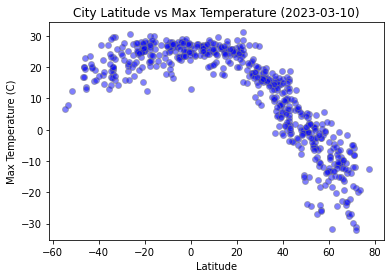

In [4]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(latitude, max_temp, c = "blue", alpha = 0.5, edgecolors='gray')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-03-10)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

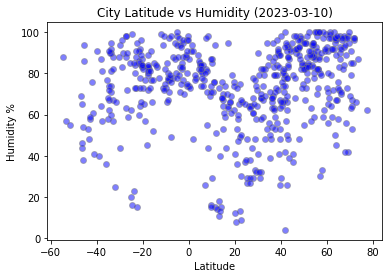

In [5]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, c = "blue", alpha = 0.5, edgecolors='gray')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity (2023-03-10)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

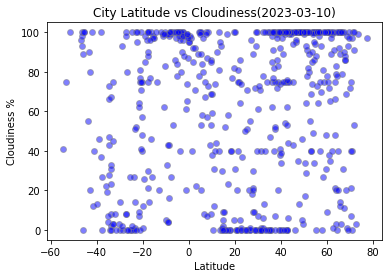

In [6]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, c = "blue", alpha = 0.5, edgecolors='gray')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness(2023-03-10)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

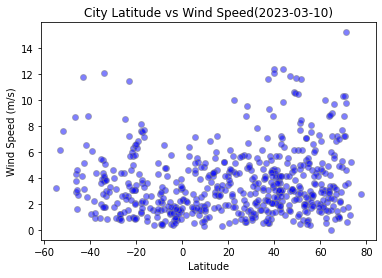

In [7]:
# Build the scatter plots for latitude vs. wind speed
windspeed = city_data_df["Wind Speed"]

plt.scatter(latitude, windspeed, c = "blue", alpha = 0.5, edgecolors='gray')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed(2023-03-10)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def Lin_Regress_Plots(x_values, y_values):
    #Inside the function, get the linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #Store the equation of the line in a variable
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    #Calculate the regression values
    regress_values = x_values*slope + intercept
    
    #print the r value
    print(f"The r-value is {rvalue}")
    print(f"The equation of the line is {line_eq}")
     
    #plot all the information, including the line and equation
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color = "red")
    plt.xlabel("Latitude")
    plt.show

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kapaa,22.0752,-159.3190,24.55,65,75,5.66,US,1678493580
3,pemangkat,1.1667,108.9667,24.52,91,97,2.92,ID,1678493580
4,torbay,47.6666,-52.7314,0.88,92,100,4.47,CA,1678493581
7,yerbogachen,61.2767,108.0108,-31.88,100,35,1.81,RU,1678493539
9,grand-lahou,5.1367,-5.0242,26.62,85,100,0.52,CI,1678493586


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,20.03,58,20,5.14,AU,1678493579
1,punta arenas,-53.1500,-70.9167,8.06,57,75,6.17,CL,1678493579
5,tautira,-17.7333,-149.1500,27.91,79,100,7.64,PF,1678493582
6,kamina,-8.7386,24.9906,17.86,97,98,2.10,CD,1678493583
8,vaini,-21.2000,-175.2000,25.83,64,77,6.27,TO,1678493586


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.9044354709821762
The equation of the line is y = -0.71x + 34.79


Text(0, 0.5, 'Max Temp (C)')

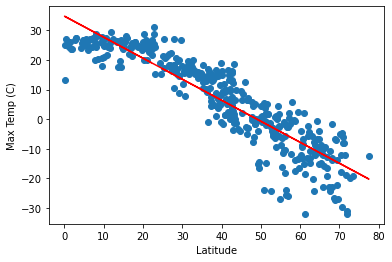

In [18]:
# Linear regression on Northern Hemisphere
Lin_Regress_Plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Max Temp (C)")

The r-value is 0.5621424782500727
The equation of the line is y = 0.19x + 27.11


Text(0, 0.5, 'Max Temp (C)')

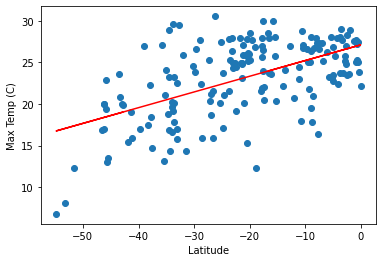

In [19]:
# Linear regression on Southern Hemisphere
Lin_Regress_Plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Max Temp (C)")

**Discussion about the linear relationship:** 
- As expected, there is a large correlation between the latitude of a city above the equator and the Max Temperature reached in that city. The further away from the equator you go, the lower the maximum temperature is. The strong relationship is evidenced by the r-value of -0.90, showing a strong negative correlation. This makes intuitive sense based on our understanding of thermal energy reaching areas of the globe.
- There is also a similar correlation between the latitude and maximum temperature in the southern hemisphere, though not as strong. The r-value for these data is 0.56, still showing warmer maximum temperatures nearer the equator. Some potential reasons for the less strong correlation include:
 - The latitudes on the x-axis do not go as far away from the equator, owing to fewer cities at further distances from the equator in the southern hemisphere as compared to the northern hemisphere.
 - At the time this data was sourced, it is summer in the southern hemisphere, likely to leading to higher daily maximum temperatures, and therefore fewer extremes as you move between the equator and the south pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.35208714501464455
The equation of the line is y = 0.38x + 56.89


Text(0, 0.5, 'Humidity')

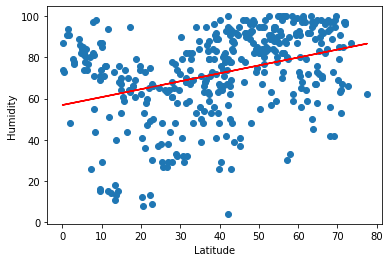

In [20]:
# Northern Hemisphere
Lin_Regress_Plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Humidity (%)")

The r-value is 0.38477907390520966
The equation of the line is y = 0.49x + 86.43


Text(0, 0.5, 'Humidity')

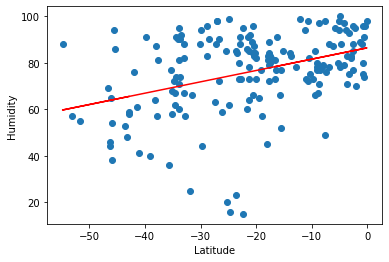

In [21]:
# Southern Hemisphere
Lin_Regress_Plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** 
These graphs indicate:
- In the northern hemisphere, humidity decreases as you get closer to the equator, with higher latitudes experiencing higher humidities.
- In the southern hemisphere the opposite is true, and humidity increases as you get closer to the equator, with cities further from the equator experiencing lower humidities.

However, the correlation in both graphs is small, with r-values of 0.35 and 0.38, respectively. Similarly, in the graphs you can visually see the variability in location of data points on the graph. This likely indicates that while latitude may play some role in humidity, there are likely other things at play.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.18736848025342814
The equation of the line is y = 0.36x + 47.73


Text(0, 0.5, 'Cloudiness')

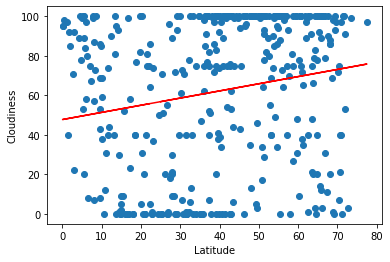

In [22]:
# Northern Hemisphere
Lin_Regress_Plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Cloudiness (%)")

The r-value is 0.3374287354105626
The equation of the line is y = 0.95x + 79.16


Text(0, 0.5, 'Cloudiness')

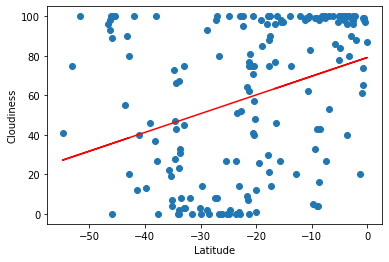

In [23]:
# Southern Hemisphere
Lin_Regress_Plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:**

Both of these graphs indicate similar findings to humidity:
- In the northern hemisphere, cloudiness decreases as you get closer to the equator, with higher latitudes experiencing more cloudiness on the whole.
- In the southern hemisphere the opposite is true, and cloudiness increases as you get closer to the equator, with cities further from the equator experiencing lower levels of cloudiness.

Again though, the correlation in both graphs is small, 0.18 and 0.33, respectively. You can also see that visually in these graphs, a linear relationship may not the the most apt for representing this data. In both graphs you see clusters of very low (approximately 0%) and very high (approximately 100%) cloudiness around different latitude ranges.
- In the northern hemisphere, you can see a cluster at 0% between roughly 10 and 40 degrees latitude and a cluster at 100% between roughly 30 and 80 degrees latitude.
- You can see similar clusters in the southern hemisphere with a cluster close to 100% between 0 and -20 degrees latitude and a cluster of roughly 0% between roughly -20 and -35 degrees

This indicates that there is maybe more a "banding" phenomenon across latitudes, rather than a direct linear relationship. More data would be needed to determine this.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.16366016568507358
The equation of the line is y = 0.02x + 2.94


Text(0, 0.5, 'Wind Speed (m/s)')

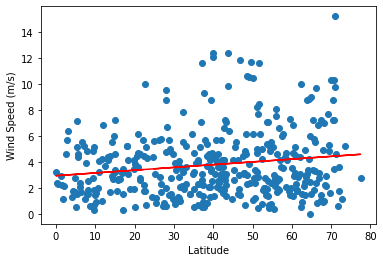

In [24]:
# Northern Hemisphere
Lin_Regress_Plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Wind Speed (m/s)")

The r-value is -0.33214653688479134
The equation of the line is y = -0.06x + 2.02


Text(0, 0.5, 'Wind Speed (m/s)')

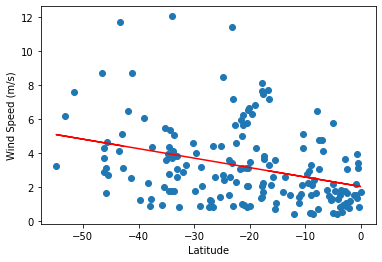

In [25]:
# Southern Hemisphere
Lin_Regress_Plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
#Defining these outside of the function because the ylabel will change with each graph
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:**
Both of these graphs also indicate small correlations between latitude and wind speed:
- In the northern hemisphere, wind speed decreases as you get closer to the equator, with higher latitudes experiencing higher wind speeds on the whole.
- In the southern hemisphere the opposite is true, and wind speed increases as you get closer to the equator, with cities further from the equator experiencing lower wind speeds in general

Again though, the correlation in both graphs is small, 0.16 and 0.33, respectively.